In [1]:
# Predicting Survival in the Titanic Data Set
# We will be using a decision tree to make predictions about the Titanic data set from
# Kaggle. This data set provides information on the Titanic passengers and can be used to
# predict whether a passenger survived or not.

# You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard),
# and Fare to predict whether a passenger survived.

<b>Importing</b>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split,cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report,precision_score,recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

D:\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


<b>Importing Data</b>

In [3]:
url = "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"
titanic = pd.read_csv(url)

In [4]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
titanic_def = titanic.drop(['PassengerId',  'Name', 'Ticket', 'Cabin', 'Embarked'],axis=1)

In [6]:
titanic_def.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

## Data Exploration

In [7]:
titanic_def.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [8]:
titanic_def.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
titanic_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.8+ KB


## Data Cleaning

In [10]:
titanic_def['Age'].fillna(titanic_def['Age'].mean(), inplace=True)

In [11]:
titanic_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.8+ KB


## Data Visualization

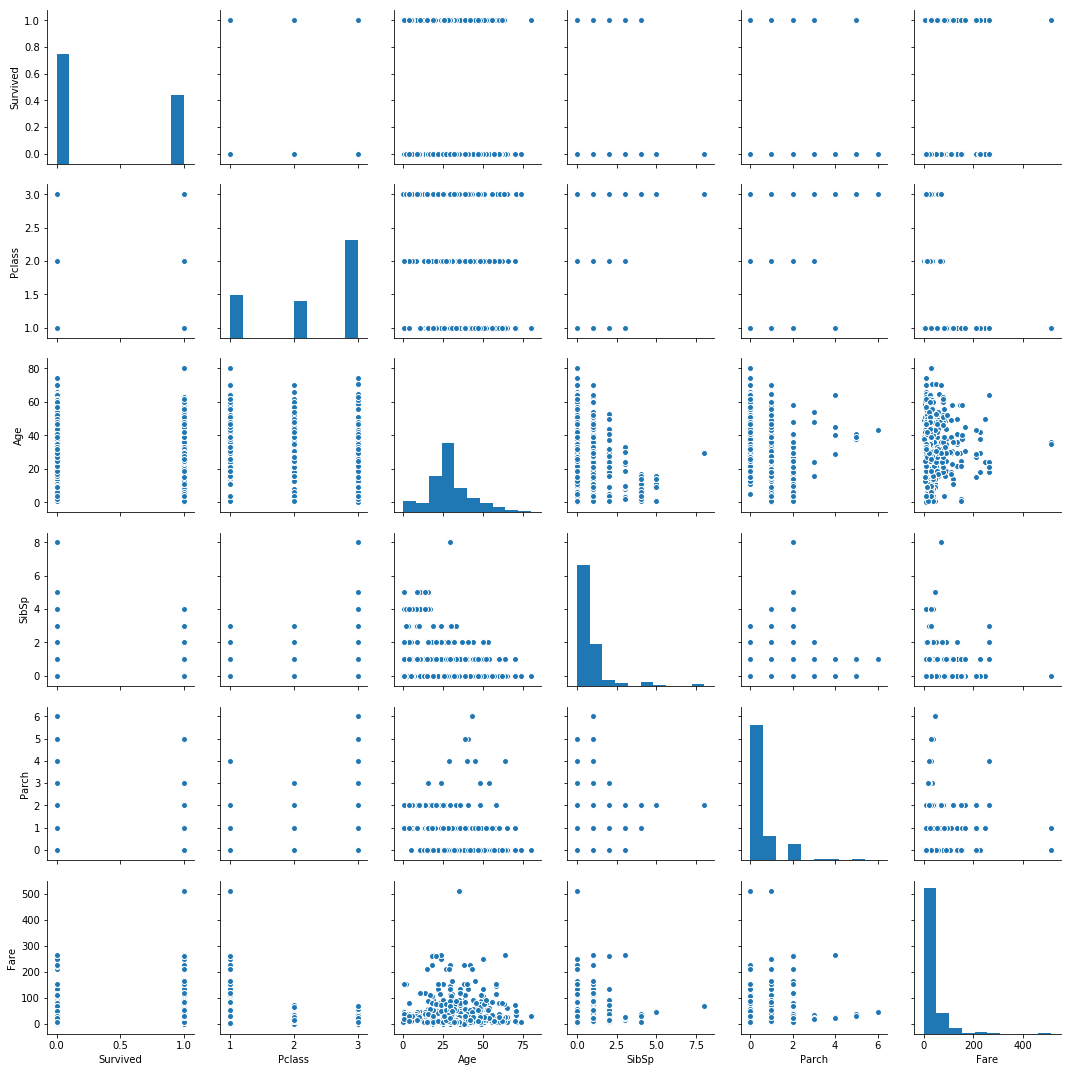

In [12]:
sb.pairplot(titanic_def)

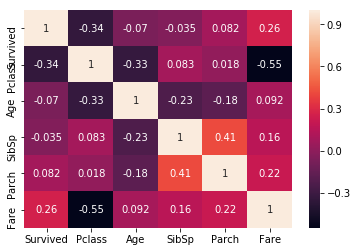

In [13]:
sb.heatmap(titanic_def.corr(),annot=True)

## Data Preprocessing

In [14]:
titanic_def['Sex'] = titanic_def['Sex'].astype('category').cat.codes

In [15]:
titanic_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int8
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(4), int8(1)
memory usage: 42.7 KB


In [16]:
titanic_def['Age'] = titanic_def['Age'].astype('int')

## Test and Train Data Set

In [17]:
X = titanic_def.drop('Survived', axis=1)
y = titanic_def['Survived']

In [18]:
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.3,random_state=101)

## Creating and Training the Model


MAE: 0.22761194029850745
MSE: 0.22761194029850745
RMSE: 0.47708693159476445
Precision Score  0.743119
Recall Score  0.710526


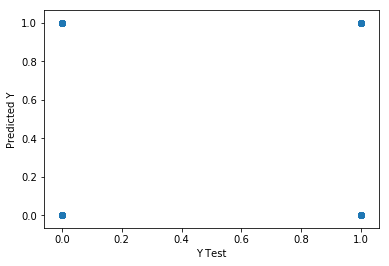

In [19]:
# Training Model using Gini
dectree =  DecisionTreeClassifier()
dectree.fit(X_train,y_train)
predicted = dectree.predict(X_test)
predicted
dectree.score(X_test,y_test)
plt.scatter(y_test,predicted)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
# calculate these metrics by for the Predicted and Test Data
print('MAE:', metrics.mean_absolute_error(y_test, predicted))
print('MSE:', metrics.mean_squared_error(y_test, predicted))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, predicted)))
print('Precision Score  {:2f}'.format(precision_score(y_test,predicted)))
print('Recall Score  {:2f}'.format(recall_score(y_test,predicted)))

MAE: 0.19776119402985073
MSE: 0.19776119402985073
RMSE: 0.4447034900131218
Precision Score  0.790476
Recall Score  0.728070


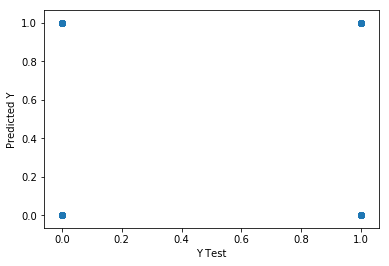

In [20]:
# Model using Entropy
dectree =  DecisionTreeClassifier(criterion='entropy')
dectree.fit(X_train,y_train)
predicted = dectree.predict(X_test)
predicted
dectree.score(X_test,y_test)
plt.scatter(y_test,predicted)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
# calculate these metrics by for the Predicted and Test Data
print('MAE:', metrics.mean_absolute_error(y_test, predicted))
print('MSE:', metrics.mean_squared_error(y_test, predicted))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, predicted)))
print('Precision Score  {:2f}'.format(precision_score(y_test,predicted)))
print('Recall Score  {:2f}'.format(recall_score(y_test,predicted)))

## Model Evaluation using Cross Validation

In [21]:
# Model Metrics using Gini Method
scores = cross_val_score(DecisionTreeClassifier(), X_train, y_train, scoring='neg_mean_squared_error', cv=10)
scores
print(np.sqrt(scores.mean() * -1))
predictions = cross_val_predict(DecisionTreeClassifier(), X_train, y_train, cv=3)
print(confusion_matrix(y_train, predictions))
print(precision_score(y_train,predictions))
print(recall_score(y_train,predictions))

0.4857102862133083
[[337  58]
 [ 74 154]]
0.7264150943396226
0.6754385964912281


In [22]:
# Model metrics using Entropy Method
scores = cross_val_score(DecisionTreeClassifier(criterion='entropy'), X_train, y_train, scoring='neg_mean_squared_error', cv=10)
scores
print(np.sqrt(scores.mean() * -1))
predictions = cross_val_predict(DecisionTreeClassifier(), X_train, y_train, cv=3)
print(confusion_matrix(y_train, predictions))
print(precision_score(y_train,predictions))
print(recall_score(y_train,predictions))

0.475806170627902
[[333  62]
 [ 73 155]]
0.7142857142857143
0.6798245614035088
